In [ ]:
#pip install opencv-python

In [ ]:
#pip install matplotlib

In [ ]:
#pip install geopandas

In [ ]:
#pip install -U segmentation-models-pytorch albumentations --user

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import cv2
import matplotlib.pyplot as plt
#import shutil
import geopandas as gpd
import albumentations as albu
import zipfile
import fiona

# Unzip and extract data sample

In [4]:
DATA_DIR = '../../../../net/projects/cmap/data/kane-county-data'
# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
    print("Doesn't exist")

In [26]:
zip_file_path = os.path.join(DATA_DIR, 'KC_StormwaterDataJan2024.gdb.zip')

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("../data")


In [53]:
# Path to the Geodatabase file
gdb_path = "../data/KC_StormwaterDataJan2024.gdb"

# Get the list of layers in the Geodatabase
layers = fiona.listlayers(gdb_path)

# Print the available layers
print("Available layers:", layers)

if layers:
    for selected_layer in layers:
        print("Selected layer:", selected_layer)
        
        # Load the GeoPandas DataFrame
        gdf = gpd.read_file(gdb_path, layer=selected_layer)
        print(gdf.head())
else:
    print("No layers found in the Geodatabase.")


Available layers: ['Watersheds_Jan2022', 'WTR_Storm_Sewer', 'WTR_Storm_Structures', 'WTR_Streams', 'WTR_Countywide_Stormwater_Storage', 'WTR_Countywide_Stormwater_Storage__ATTACH', 'Dams', 'Stormwater_CrossingsJan2024']
Selected layer: Watersheds_Jan2022
   OBJECTID    Shape_Leng                Name        Mjr_WtrShe     Area_Ac  \
0         1   6623.691206         Ferry Creek      DuPage River   18.520100   
1         1  15122.413671  Pokagon Creek East         Fox River  115.471001   
2         2  14854.757269    Town of Lakewood  Kishwaukee River  120.751999   
3         3  13113.682117       Pokagon Creek         Fox River   66.179901   
4         6  35391.992637         Eakin Creek  Kishwaukee River  472.101990   

   Area_SqMi  Shape_Length    Shape_Area  \
0   0.028938   6623.691206  8.067336e+05   
1   0.180424  15122.413671  5.029908e+06   
2   0.188675  14854.757269  5.259926e+06   
3   0.103406  13113.682117  2.882783e+06   
4   0.737659  35391.992637  2.056467e+07   

     

In [52]:
import zipfile

#zip_file_path = "../data/KC_StormFlowPathJuly2022.gdb.zip"
zip_file_path = os.path.join(DATA_DIR, 'KC_StormwaterDataJan2024.gdb.zip')
# Open the ZIP file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get a list of all files and directories in the ZIP file
    zip_contents = zip_ref.namelist()

# Print the list of files and directories
print("Files in ZIP file:")
for item in zip_contents:
    print(item)


Files in ZIP file:
KC_StormwaterDataJan2024.gdb/a00000001.gdbindexes
KC_StormwaterDataJan2024.gdb/a00000001.gdbtable
KC_StormwaterDataJan2024.gdb/a00000001.gdbtablx
KC_StormwaterDataJan2024.gdb/a00000001.TablesByName.atx
KC_StormwaterDataJan2024.gdb/a00000002.gdbtable
KC_StormwaterDataJan2024.gdb/a00000002.gdbtablx
KC_StormwaterDataJan2024.gdb/a00000003.gdbindexes
KC_StormwaterDataJan2024.gdb/a00000003.gdbtable
KC_StormwaterDataJan2024.gdb/a00000003.gdbtablx
KC_StormwaterDataJan2024.gdb/a00000004.CatItemsByPhysicalName.atx
KC_StormwaterDataJan2024.gdb/a00000004.CatItemsByType.atx
KC_StormwaterDataJan2024.gdb/a00000004.FDO_UUID.atx
KC_StormwaterDataJan2024.gdb/a00000004.freelist
KC_StormwaterDataJan2024.gdb/a00000004.gdbindexes
KC_StormwaterDataJan2024.gdb/a00000004.gdbtable
KC_StormwaterDataJan2024.gdb/a00000004.gdbtablx
KC_StormwaterDataJan2024.gdb/a00000004.spx
KC_StormwaterDataJan2024.gdb/a00000005.CatItemTypesByName.atx
KC_StormwaterDataJan2024.gdb/a00000005.CatItemTypesByParentTyp

In [7]:
zip_file_path = os.path.join(DATA_DIR, 'CountywideDepressionalStorage.gdb.zip')

zip_file_size = os.path.getsize(zip_file_path)

# Convert bytes to kilobytes (1 KB = 1024 bytes)
zip_file_size_gb = zip_file_size / (1024 ** 3)

print(f"Size of the ZIP file: {zip_file_size_gb:.2f} GB")

Size of the ZIP file: 1.54 GB


# Begin separation trial

In [117]:
gdb_path = "../data/KC_StormwaterDataJan2024.gdb"
layers = fiona.listlayers(gdb_path)

# Print the available layers
print("Available layers:", layers)

if layers:
    print("Data from KC_StormwaterDataJan2024.gdb")
    for selected_layer in layers:
        if (selected_layer == "WTR_Countywide_Stormwater_Storage__ATTACH"):
            print(f"Skipped analysis of {selected_layer} for now")
            count = 0
        else:
            print("Selected layer:", selected_layer)
            
            # Load the GeoPandas DataFrame
            gdf = gpd.read_file(gdb_path, layer=selected_layer)
            print("Geometry Type:",type(gdf.geometry[0]))
            print("Length:", len(gdf.index))
else:
    print("No layers found in the Geodatabase.")

Available layers: ['Watersheds_Jan2022', 'WTR_Storm_Sewer', 'WTR_Storm_Structures', 'WTR_Streams', 'WTR_Countywide_Stormwater_Storage', 'WTR_Countywide_Stormwater_Storage__ATTACH', 'Dams', 'Stormwater_CrossingsJan2024']
Data from KC_StormwaterDataJan2024.gdb
Selected layer: Watersheds_Jan2022
<class 'shapely.geometry.multipolygon.MultiPolygon'>
51
Selected layer: WTR_Storm_Sewer
<class 'shapely.geometry.multilinestring.MultiLineString'>
137854
Selected layer: WTR_Storm_Structures
<class 'shapely.geometry.point.Point'>
109174
Selected layer: WTR_Streams
<class 'shapely.geometry.multilinestring.MultiLineString'>
607
Selected layer: WTR_Countywide_Stormwater_Storage
<class 'shapely.geometry.multipolygon.MultiPolygon'>
5367
Skipped analysis of WTR_Countywide_Stormwater_Storage__ATTACH for now
Selected layer: Dams
<class 'shapely.geometry.point.Point'>
103
Selected layer: Stormwater_CrossingsJan2024
<class 'shapely.geometry.point.Point'>
1852


In [111]:
selected_layer = 'Watersheds_Jan2022'
gdf = gpd.read_file(gdb_path, layer=selected_layer)
gdf.head()

OBJECTID    Shape_Leng                Name        Mjr_WtrShe     Area_Ac  \
0         1   6623.691206         Ferry Creek      DuPage River   18.520100   
1         1  15122.413671  Pokagon Creek East         Fox River  115.471001   
2         2  14854.757269    Town of Lakewood  Kishwaukee River  120.751999   
3         3  13113.682117       Pokagon Creek         Fox River   66.179901   
4         6  35391.992637         Eakin Creek  Kishwaukee River  472.101990   

   Area_SqMi  Shape_Length    Shape_Area  \
0   0.028938   6623.691206  8.067336e+05   
1   0.180424  15122.413671  5.029908e+06   
2   0.188675  14854.757269  5.259926e+06   
3   0.103406  13113.682117  2.882783e+06   
4   0.737659  35391.992637  2.056467e+07   

                                            geometry  
0  MULTIPOLYGON (((1003479.906 1882790.198, 10034...  
1  MULTIPOLYGON (((1005524.446 1998702.010, 10055...  
2  MULTIPOLYGON (((976357.374 1998683.543, 976350...  
3  MULTIPOLYGON (((999448.944 1998693.415, 999446...  
4  MULTIPOLYGON (((945601.251 1998650.187, 946633...

In [18]:
selected_layer = 'WTR_Storm_Structures' #'WTR_Storm_Sewer' #'WTR_Streams'
gdf = gpd.read_file(gdb_path, layer=selected_layer)
gdf
#gdf.head()

NameError: name 'gdb_path' is not defined

In [70]:
#pip install utm

  Preparing metadata (setup.py) ... done
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6085 sha256=3bb4ea946acdfde6c0f8918fbdd250e0a97198a18e75300c96820d98ef2a1165
  Stored in directory: /home/rubensteinm/.cache/pip/wheels/75/f0/dd/39dfc9436520412399934d4a8566fe5c0cb8cc2568a1196057
Successfully built utm
Note: you may need to restart the kernel to use updated packages.


In [19]:
import utm

# Specify the latitude and longitude of the location
latitude = 41.789795  # Replace with the latitude of your location
longitude = -87.599926  # Replace with the longitude of your location

# Get UTM zone information
zone_number, zone_letter = utm.from_latlon(latitude, longitude)[:2]

print(f"UTM Zone: {zone_number}, {zone_letter}")

UTM Zone: 450152.2707648752, 4626611.747003874


In [53]:
gdf.crs

<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Illinois - counties of Boone; Champaign; Clark; Clay; Coles; Cook; Crawford; Cumberland; De Kalb; De Witt; Douglas; Du Page; Edgar; Edwards; Effingham; Fayette; Ford; Franklin; Gallatin; Grundy; Hamilton; Hardin; Iroquois; Jasper; Jefferson; Johnson; Kane; Kankakee; Kendall; La Salle; Lake; Lawrence; Livingston; Macon; Marion; Massac; McHenry; McLean; Moultrie; Piatt; Pope; Richland; Saline; Shelby; Vermilion; Wabash; Wayne; White; Will; Williamson.
- bounds: (-89.27, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [55]:
from shapely.geometry import MultiPolygon, shape
from shapely.ops import transform
from pyproj import Proj, transform as coord_transform

selected_layer = 'WTR_Countywide_Stormwater_Storage'
gdb_path = "../data/KC_StormwaterDataJan2024.gdb"
layers = fiona.listlayers(gdb_path)

gdf = gpd.read_file(gdb_path, layer=selected_layer)
# Define the projected coordinate system (assuming it's UTM for this example)
utm_zone = 16  # Replace with the appropriate UTM zone for your data
utm_proj = Proj(proj="utm", zone=utm_zone, ellps="WGS84", preserve_units=True)

# Example MULTIPOLYGON coordinates in UTM
multipolygon_utm = gdf.geometry[0]  # Change this line for future loops
multipolygon_geom = shape(multipolygon_utm)

# Function to transform coordinates to latitudes and longitudes
def transform_coordinates(coordinates):
    lon, lat = coord_transform(utm_proj, Proj(init="epsg:3435"), coordinates[0], coordinates[1])
    return lon, lat

# Extract and transform the coordinates
coordinates_list = [
    transform_coordinates(coord)
    for poly in multipolygon_geom.geoms
    for coord in poly.exterior.coords
]

# Print the result
for lon, lat in coordinates_list:
    print(f"Latitude: {lat}, Longitude: {lon}")
# Current output is near nicaragua; something is going wrong converting the coordinates
# Latitude: 16.947502297127883, Longitude: -82.27614460549711
# Latitude: 16.947541314195032, Longitude: -82.27616302040465
#<Projected CRS: EPSG:3435>
#Name: NAD83 / Illinois East (ftUS)
#Axis Info [cartesian]:
#- X[east]: Easting (US survey foot)
#- Y[north]: Northing (US survey foot)
#Area of Use:
#- name: United States (USA) - Illinois - counties of Boone; Champaign; Clark; Clay; Coles; Cook; Crawford; Cumberland; De Kalb; De Witt; Douglas; Du Page; Edgar; Edwards; Effingham; Fayette; Ford; Franklin; Gallatin; Grundy; Hamilton; Hardin; Iroquois; Jasper; Jefferson; Johnson; Kane; Kankakee; Kendall; La Salle; Lake; Lawrence; Livingston; Macon; Marion; Massac; McHenry; McLean; Moultrie; Piatt; Pope; Richland; Saline; Shelby; Vermilion; Wabash; Wayne; White; Will; Williamson.
#- bounds: (-89.27, 37.06, -87.02, 42.5)
#Coordinate Operation:
#- name: SPCS83 Illinois East zone (US Survey feet)
#- method: Transverse Mercator
#Datum: North American Datum 1983
#- Ellipsoid: GRS 1980
#- Prime Meridian: Greenwich

/home/rubensteinm/.conda/envs/cmap/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_3524818/841427596.py:20: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = coord_transform(utm_proj, Proj(init="epsg:3435"), coordinates[0], coordinates[1])
/home/rubensteinm/.conda/envs/cmap/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.

Latitude: -6953807.223295423, Longitude: 2914067.9732665764
Latitude: -6953814.775086497, Longitude: 2914031.5488267867
Latitude: -6953801.972106936, Longitude: 2913984.766418484
Latitude: -6953765.854310693, Longitude: 2913933.4435353945
Latitude: -6953701.872056901, Longitude: 2913902.35234565
Latitude: -6953609.952462468, Longitude: 2913901.7061220948
Latitude: -6953504.34773208, Longitude: 2913979.755951659
Latitude: -6953278.014070985, Longitude: 2914211.623480894
Latitude: -6953124.713851394, Longitude: 2914432.3311290867
Latitude: -6953082.527080968, Longitude: 2914621.7190624876
Latitude: -6953093.256102659, Longitude: 2914756.0334947496
Latitude: -6953125.047749231, Longitude: 2914800.030304609
Latitude: -6953164.174718456, Longitude: 2914838.242538394
Latitude: -6953225.351931606, Longitude: 2914853.263041959
Latitude: -6953273.582553974, Longitude: 2914841.929838766
Latitude: -6953302.998879745, Longitude: 2914808.5771723813
Latitude: -6953331.182457924, Longitude: 2914743.1

/home/rubensteinm/.conda/envs/cmap/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_3524818/841427596.py:20: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = coord_transform(utm_proj, Proj(init="epsg:3435"), coordinates[0], coordinates[1])
/home/rubensteinm/.conda/envs/cmap/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.

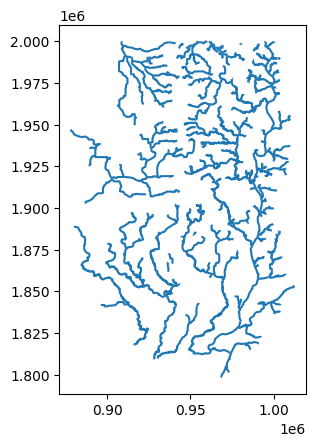

In [55]:
# Plot the data
selected_layer = 'WTR_Streams' #'Watersheds_Jan2022'
gdf = gpd.read_file(gdb_path, layer=selected_layer)
gdf.geometry.plot()
plt.show()

In [52]:
utm_zone = 16

# Define the projected coordinate system (assuming it's UTM for this example)
utm_proj = Proj(proj="utm", zone=utm_zone, ellps="WGS84")

# Coordinates in UTM
x, y = 942467.4492025003, 1916241.6924787536
print(x)
# Transform UTM coordinates to latitude and longitude
lon, lat = transform(utm_proj, Proj(init="epsg:4326"), x, y)

print(f"Latitude: {lat}, Longitude: {lon}")

942467.4492025003


/home/rubensteinm/.conda/envs/cmap/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


TypeError: transform() takes 2 positional arguments but 4 were given

In [43]:
gdf.geometry[23].geoms[0].exterior.coords[0]

(942467.4492025003, 1916241.6924787536)

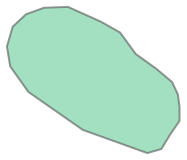

In [45]:
gdf.geometry[23]

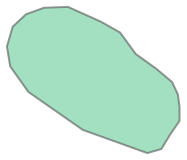

In [47]:
gdf.geometry[23].geoms[0]

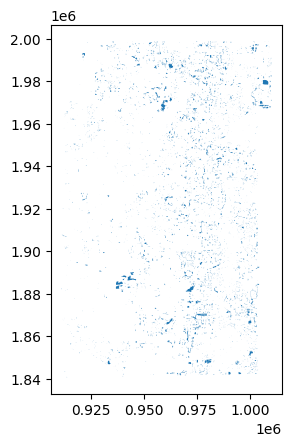

In [24]:
# Plot the data
selected_layer = 'WTR_Countywide_Stormwater_Storage' #'Watersheds_Jan2022'
gdf = gpd.read_file(gdb_path, layer=selected_layer)
gdf.geometry.plot()
plt.show()

Available layers: ['Watersheds_Jan2022', 'WTR_Storm_Sewer', 'WTR_Storm_Structures', 'WTR_Streams', 'WTR_Countywide_Stormwater_Storage', 'WTR_Countywide_Stormwater_Storage__ATTACH', 'Dams', 'Stormwater_CrossingsJan2024']
Selected layer: Watersheds_Jan2022


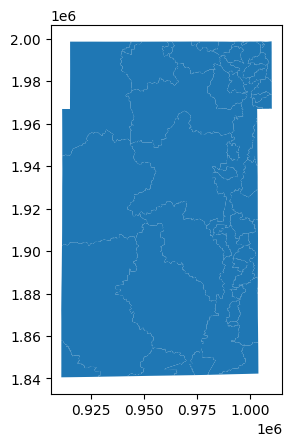

Selected layer: WTR_Storm_Sewer


KeyboardInterrupt: 

In [23]:
### All layers maps
layers = fiona.listlayers(gdb_path)

# Print the available layers
print("Available layers:", layers)
for selected_layer in layers:
    print("Selected layer:", selected_layer)
    
    # Load the GeoPandas DataFrame
    gdf = gpd.read_file(gdb_path, layer=selected_layer)
    gdf.geometry.plot()
    plt.show()
 

# To-Do: Divide images into training and validation datasets; run segmentation and other profiles

In [4]:
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')

x_test_dir = os.path.join(DATA_DIR, 'test')
y_test_dir = os.path.join(DATA_DIR, 'testannot')

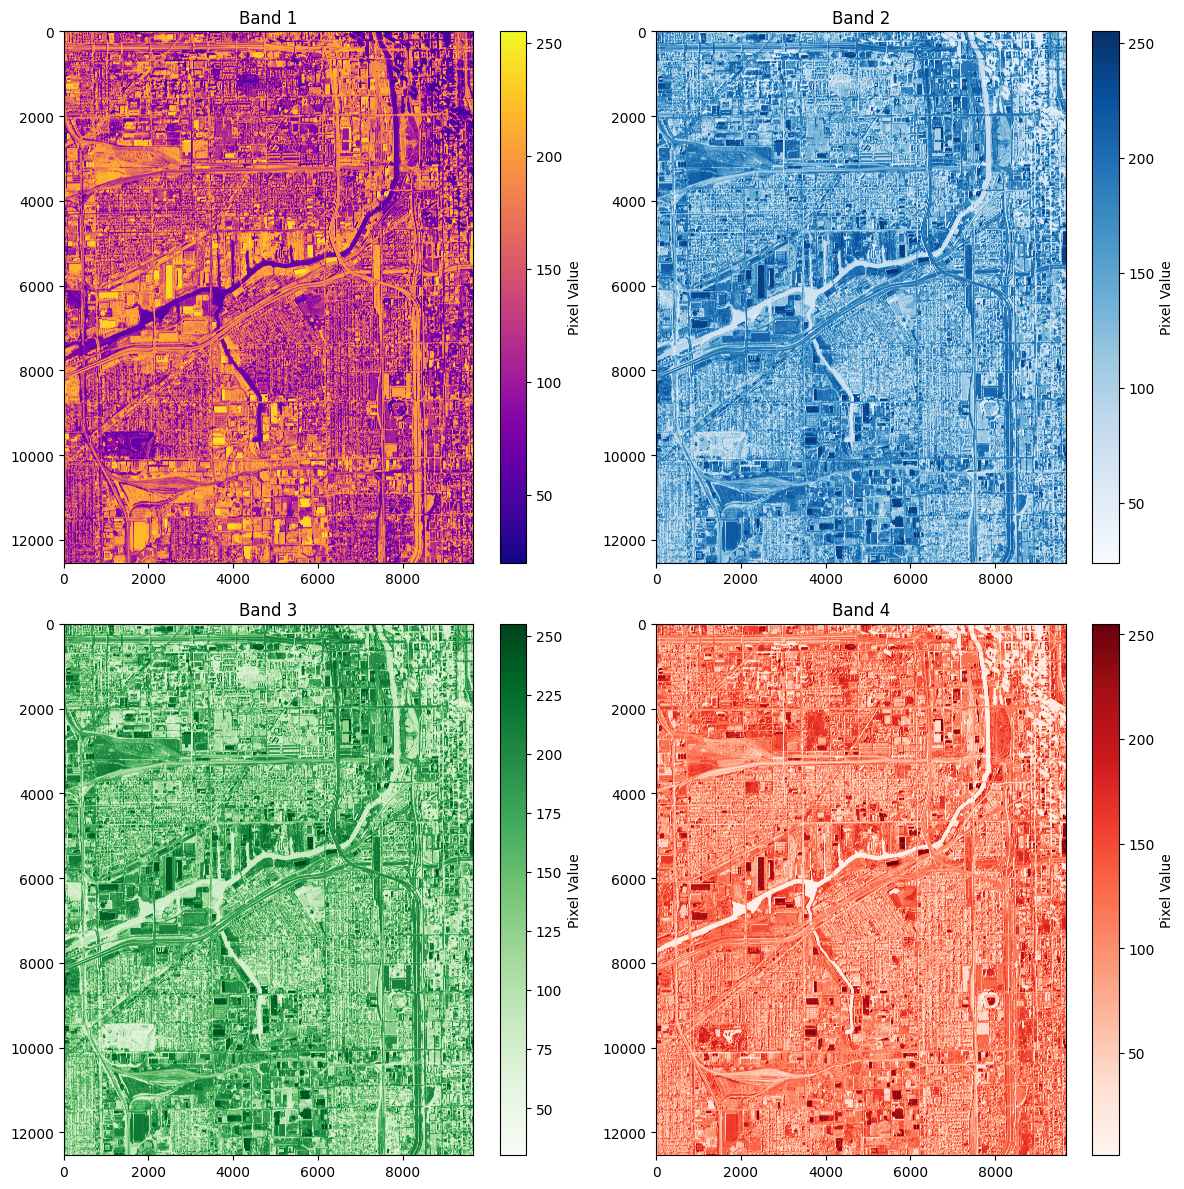

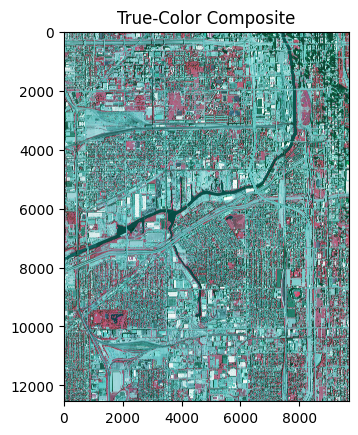

In [6]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
# Specify the path to your GeoTIFF file
tif_path = '../../../../net/projects/cmap/data/GIBI-images'

# Open the GeoTIFF file using rasterio
with rasterio.open(tif_path + '/0.tif') as src:
    # Read each band
    band1 = src.read(1)
    band2 = src.read(2)
    band3 = src.read(3)
    band4 = src.read(4)

# Display each band using matplotlib
plt.figure(figsize=(12, 12))

# Band 1
plt.subplot(2, 2, 1)
plt.imshow(band1, cmap='plasma')
plt.colorbar(label='Pixel Value')
plt.title('Band 1')

# Band 2
plt.subplot(2, 2, 2)
plt.imshow(band2, cmap='Blues')
plt.colorbar(label='Pixel Value')
plt.title('Band 2')

# Band 3
plt.subplot(2, 2, 3)
plt.imshow(band3, cmap='Greens')
plt.colorbar(label='Pixel Value')
plt.title('Band 3')

# Band 4
plt.subplot(2, 2, 4)
plt.imshow(band4, cmap='Reds')
plt.colorbar(label='Pixel Value')
plt.title('Band 4')

plt.tight_layout()
plt.show()

# Combine bands for a true-color image (e.g., Red: band4, Green: band3, Blue: band2)
true_color = [band4, band3, band2]

# Display the true-color composite using matplotlib
plt.imshow(np.stack(true_color, axis=-1))
plt.title('True-Color Composite')
plt.show()


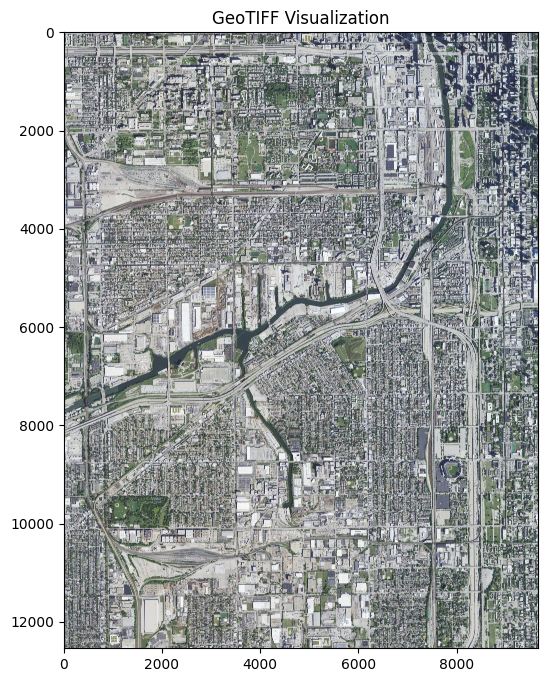

In [7]:
with rasterio.open(tif_path + '/0.tif') as src:
    raster_data = src.read()[:3]
    raster_data = raster_data.transpose((1, 2, 0))

plt.figure(figsize=(8, 8))
plt.imshow(raster_data)
plt.title('GeoTIFF Visualization')
plt.show()

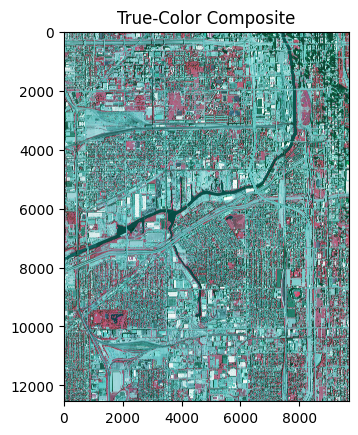

In [122]:
# Combine bands for a true-color image (e.g., Red: band4, Green: band3, Blue: band2)
true_color = [band4, band3, band2]

# Display the true-color composite using matplotlib
plt.imshow(np.stack(true_color, axis=-1))
plt.title('True-Color Composite')
plt.show()


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 9666, 'height': 12539, 'count': 4, 'crs': CRS.from_epsg(26916), 'transform': Affine(0.6, 0.0, 442638.6,
       0.0, -0.6, 4636425.6)}


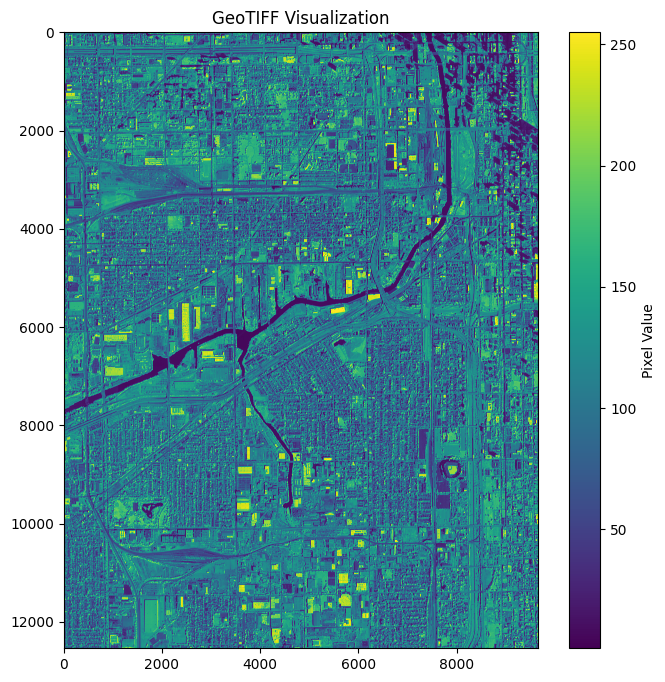

In [16]:
import rasterio
import matplotlib.pyplot as plt

# Specify the path to your GeoTIFF file
tif_path = '../../../../net/projects/cmap/data/GIBI-images'


# Open the GeoTIFF file using rasterio
with rasterio.open(tif_path + '/0.tif') as src:
    # Read the raster data
    raster_data = src.read(4)  # assuming it's a single-band image

    # Get the metadata
    metadata = src.meta
print(metadata)
# Display the raster using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(raster_data)  # You can choose a different colormap
plt.colorbar(label='Pixel Value')
plt.title('GeoTIFF Visualization')
plt.show()

In [32]:
# helper function for data visualization
def visualize(**images):
    """Plot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

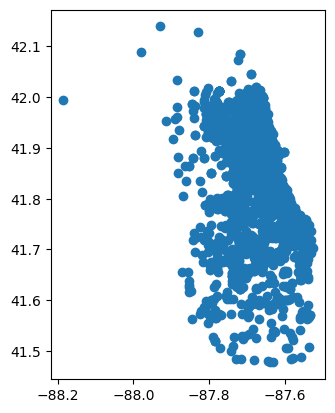

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
shapefile_path = DATA_DIR +  '/../GIBI_2021_shapefiles/GIBI_All.shp'
example_gdf = gpd.read_file(shapefile_path)

# Plot the data
example_gdf.plot()
plt.show()

In [15]:
example_gdf.geometry[0].properties

AttributeError: 'Point' object has no attribute 'properties'

In [9]:
for col in example_gdf.columns:
    print(type(example_gdf[col][0]))

<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'numpy.float64'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'str'>
<class 'NoneType'>
<class 'shapely.geometry.point.Point'>


In [18]:
example_gdf

OBJECTID                                         Data_Provi  \
0            1  City of Chicago - Department of Assests, Infor...   
1            2  City of Chicago - Department of Assests, Infor...   
2            3  City of Chicago - Department of Assests, Infor...   
3            4  City of Chicago - Department of Assests, Infor...   
4            5  City of Chicago - Department of Assests, Infor...   
...        ...                                                ...   
1848      1867                              Chicago Park District   
1849      1868     City of Chicago - Department of Transportation   
1850      1869     City of Chicago - Department of Transportation   
1851      1870     City of Chicago - Department of Transportation   
1852      1871                              Chicago Park District   

                                                Project             GI_Type  \
0                                  12th Police District    Permeable Pavers   
1                                  19th Police District    Permeable Pavers   
2                                                2FM HQ            Bioswale   
3                                   7th District Police    Permeable Pavers   
4                                   9th Police District    Permeable Pavers   
...                                                 ...                 ...   
1848                        Park 566 "USX" Natural Area  Native Landscaping   
1849        Green Alley - 103rd, 104th, Ewing, Avenue L    Permeable Pavers   
1850      Green Alley - 99th, 100th, Avenue H, Avenue J    Permeable Pavers   
1851  Green Alley - 110th St, 112th St, Avenue F, Av...    Permeable Pavers   
1852                     Steelworkers Park Natural Area  Native Landscaping   

        GI_Type2                        GI_Type3     Status Date_Compl  \
0     Green Roof  Rainwater Harvesting - Cistern       None       None   
1     Green Roof                        Bioswale  Completed       2010   
2           None                            None  Completed       2019   
3     Green Roof                            None  Completed       2009   
4     Green Roof                            None  Completed       2008   
...          ...                             ...        ...        ...   
1848        None                            None  Completed       None   
1849        None                            None  Completed       None   
1850        None                            None  Completed       None   
1851        None                            None  Completed       None   
1852        None                            None  Completed       None   

                                      Street Municipali  ... GI_Capacit  \
0                       1400 S.  Blue Island    Chicago  ...       None   
1                             850 W. Addison    Chicago  ...       None   
2                                210 W. 69th    Chicago  ...       None   
3                               1438 W. 63Rd    Chicago  ...       None   
4                           3150  S. Halsted    Chicago  ...       None   
...                                      ...        ...  ...        ...   
1848                          7901 S Brandon    Chicago  ...       None   
1849           103Rd, 104Th, Ewing, Avenue L    Chicago  ...       None   
1850         99Th, 100Th, Avenue H, Avenue J    Chicago  ...       None   
1851  110Th St, 112Th St, Avenue F, Avenue G    Chicago  ...       None   
1852                   E 87TH St at the lake    Chicago  ...       None   

     Rain_Event  Total_Trib Imp_Trib                             Watershed  \
0          None        None     None                                  None   
1          None        None     None                                  None   
2          None        None     None                                  None   
3          None        None     None                                  None   
4          None        None     None            

In [ ]:
#pip install torch-utils

In [5]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

In [6]:
class Dataset(BaseDataset):
    """CMAP Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    CLASSES = ['sky', 'building', 'pole', 'road', 'pavement', 
               'tree', 'signsymbol', 'fence', 'car', 
               'pedestrian', 'bicyclist', 'unlabelled']
    ### Classes need to be changed to match those found in the imagery data
    ### Potentially use unique, shp to find various labels
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)
        
        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)

In [ ]:
# Lets look at data we have

dataset = Dataset(x_train_dir, y_train_dir, classes=['car'])

image, mask = dataset[4] # get some sample
visualize(
    image=image, 
    cars_mask=mask.squeeze(),
)

In [ ]:
# Lets look at data we have

dataset = Dataset(x_train_dir, y_train_dir, classes=['car'])

image, mask = dataset[4] # get some sample
visualize(
    image=image, 
    cars_mask=mask.squeeze(),
)

In [ ]:
#pip install albumentations

In [7]:
def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5),

        albu.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        albu.PadIfNeeded(min_height=320, min_width=320, always_apply=True, border_mode=0),
        albu.RandomCrop(height=320, width=320, always_apply=True),

        albu.IAAAdditiveGaussianNoise(p=0.2),
        albu.IAAPerspective(p=0.5),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.IAASharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.RandomContrast(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(384, 480)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

In [ ]:
#### Visualize resulted augmented images and masks

augmented_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    augmentation=get_training_augmentation(), 
    classes=['car'],
)

# same image with different random transforms
for i in range(3):
    image, mask = augmented_dataset[1]
    visualize(image=image, mask=mask.squeeze(-1))

In [8]:
import torch
import numpy as np
import segmentation_models_pytorch as smp

In [ ]:
ENCODER = 'se_resnext50_32x4d'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['car'] ### Same here, replace classes?
ACTIVATION = 'sigmoid' # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
model = smp.FPN(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [ ]:
train_dataset = Dataset(
    x_train_dir, 
    y_train_dir, 
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = Dataset(
    x_valid_dir, 
    y_valid_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=12)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=4)

In [ ]:
# Dice/F1 score - https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
# IoU/Jaccard score - https://en.wikipedia.org/wiki/Jaccard_index

loss = smp.utils.losses.DiceLoss()
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

In [ ]:
# create epoch runners 
# it is a simple loop of iterating over dataloader`s samples
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [ ]:
# train model for 40 epochs

max_score = 0

for i in range(0, 40):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # do something (save model, change lr, etc.)
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, './best_model.pth')
        print('Model saved!')
        
    if i == 25:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-5!')

In [ ]:
# load best saved checkpoint
best_model = torch.load('./best_model.pth')

In [ ]:
# create test dataset
test_dataset = Dataset(
    x_test_dir, 
    y_test_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

test_dataloader = DataLoader(test_dataset)

In [ ]:
# evaluate model on test set
test_epoch = smp.utils.train.ValidEpoch(
    model=best_model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
)

logs = test_epoch.run(test_dataloader)

In [ ]:
# test dataset without transformations for image visualization
test_dataset_vis = Dataset(
    x_test_dir, y_test_dir, 
    classes=CLASSES,
)

In [ ]:
for i in range(5):
    n = np.random.choice(len(test_dataset))
    
    image_vis = test_dataset_vis[n][0].astype('uint8')
    image, gt_mask = test_dataset[n]
    
    gt_mask = gt_mask.squeeze()
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )